In [2]:
# import shutil
# shutil.unpack_archive('../data/medium-articles-dataset.zip', '../data/')

In [ ]:
import pandas as pd
import time
from text_preprocessing import *
import json
import pickle
from tqdm import tqdm
import spacy
from rebel import spacy_component

### Relation extraction runs in cmd : ```run_rebel_medium.py```

### Extracted relations analysis

In [2]:
with open('medium_rel_extracted_from_cmd.json', 'r') as fp:
    data = json.load(fp)

In [20]:
relation_types = list()
for i in tqdm(list(data.keys())[:-1], total=len(data.keys())):
    relation_types.append(data[i]['relation'])

100%|█████████▉| 7444/7445 [00:00<00:00, 600731.12it/s]


In [21]:
unique_relation_types_counter = dict(Counter(relation_types))

In [24]:
len(unique_relation_types_counter)

116

In [5]:
unique_relation_types_vc = dict(sorted(unique_relation_types_counter.items(), key=lambda t: t[1], reverse=True))

In [27]:
unique_relation_types_vc

{'main subject': 1327,
 'facet of': 878,
 'has part': 549,
 'subclass of': 515,
 'part of': 484,
 'instance of': 439,
 'use': 358,
 'different from': 316,
 'followed by': 260,
 'opposite of': 196,
 'programming language': 174,
 'follows': 131,
 'said to be the same as': 117,
 'point in time': 99,
 'studies': 97,
 'is a list of': 95,
 'uses': 87,
 'field of this occupation': 84,
 'product or material produced': 83,
 'author': 74,
 'practiced by': 61,
 'studied by': 59,
 'field of work': 59,
 'performer': 56,
 'used by': 54,
 'has effect': 51,
 'developer': 48,
 'part of the series': 41,
 'owned by': 37,
 'genre': 34,
 'operating system': 33,
 'country': 32,
 'has cause': 31,
 'owner of': 30,
 'based on': 29,
 'notable work': 25,
 'located in the administrative territorial entity': 23,
 'derivative work': 22,
 'platform': 20,
 'present in work': 20,
 'influenced by': 17,
 'sport': 16,
 'publisher': 15,
 'characters': 15,
 'industry': 15,
 'publication date': 13,
 'occupation': 12,
 'name

In [9]:
from matplotlib import pyplot as plt
import itertools

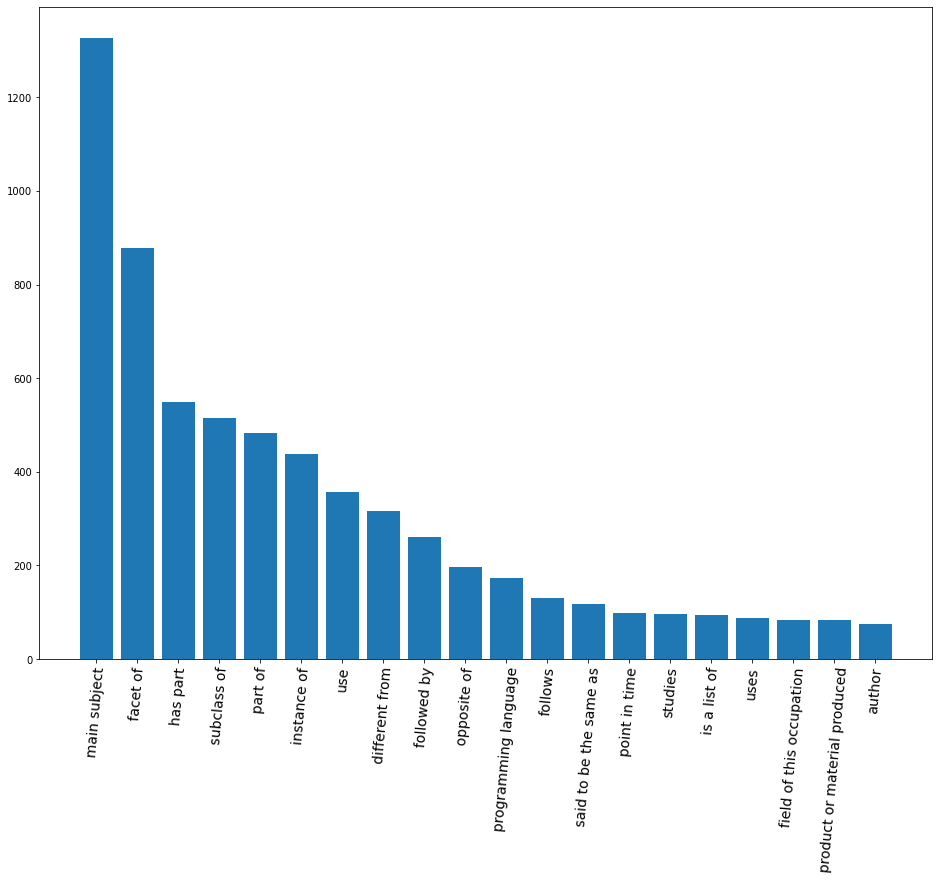

In [19]:
plt.figure(figsize=(16, 12))
plt.bar(*zip(*dict(itertools.islice(unique_relation_types_vc.items(), 20)).items()))
plt.xticks(rotation=85, fontsize=14)
plt.show()


In [33]:
example_rel_type = list()
for k, v in tqdm(list(data.items())[:-1], total=len(data.items())):
    if v['relation'] == 'main subject':
        example_rel_type.append((k, v))

100%|█████████▉| 7444/7445 [00:00<00:00, 633417.17it/s]


In [34]:
example_rel_type

[('An Easy Introduction to SQL for Data Scientists->(0, 4)',
  {'relation': 'main subject',
   'head': 'An Easy Introduction to SQL for Data Scientists',
   'tail': 'SQL'}),
 ('How To Retain More From The Books You Read->(0, 2)',
  {'relation': 'main subject',
   'head': 'How To Retain More From The Books You Read',
   'tail': 'Retain More From The Books You Read'}),
 ('Living as an Empath w->(0, 3)',
  {'relation': 'main subject',
   'head': 'Living as an Empath',
   'tail': 'Empath'}),
 ('Why Sometimes it’s Better to Sell Picks and Shovels than Mine for Gold->(0, 0)',
  {'relation': 'main subject',
   'head': 'Why Sometimes it’s Better to Sell Picks and Shovels than Mine for Gold',
   'tail': 'Why Sometimes it’s Better to Sell Picks and Shovels than Mine for Gold'}),
 ('Death Stranding Is About the Fracturing Soul of America->(0, 5)',
  {'relation': 'main subject',
   'head': 'Death Stranding',
   'tail': 'Fracturing Soul of America'}),
 ('A Framework for Creativity->(1, 3)',
  {'rel